# Competição Kaggle - Titanic 

O naufrágio do Titanic é um dos mais famosos em toda a história, no dia 15 de abril de 1912, durante a sua viagem, o então considerado "inafundável" navio RMS Titanic afundou depois de colidir com um iceberg. Infelizmente não haviam coletes salva-vidas para todo mundo a bordo, o que resultou na morte de 1502 em um total de 2224 passageiros.

Enquanto existiu alguma sorte para os que conseguiram sobreviver, parece que alguns dos grupos de pessoas tiveram mais chance de sobreviver do que outros, e nessa competição, é pedido que desenvolva um modelo preditivo capaz de responder a seguinte pergunta: "Quais tipos de pessoas tinha a maior chance de sobreviver?"

O desafio é o seguinte: usar machine learning para criar um modelo para prever quais passageiros sobreviveriam ao naufrágio do Titanic

O arquivo de submissão deve conter o PassengerId e uma coluna booleana Survived, e deverá ter exatamente 418 registros.

Dicionário de variáveis: 
Survival -> se o passageiro sobreviveu (0 = Não, 1 = Sim)  <br>
pclass -> classe do ticket  <br>
sibsp -> número de irmãos/cônjuges a bordo do navio <br>
parch -> número de pais/filhos a bordo do navio<br>
ticket -> número do ticket <br>
fare -> preço da passagem <br>
cabin -> número da cabine <br>
embarked -> porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)<br>

## Neste primeiro caderno, ambos datasets são juntados para realizar um data understanding do conjunto total de dados

## Importação das bibliotecas e dos dataframes

In [3]:
#Criação e manipulação dos dataframes 
import pandas as pd 

#Visualização gráfica
import seaborn as sns 
import matplotlib.pyplot as plt 

#Operações matemáticas
import numpy as np 

#Quantas familias tinham a bordo?
#Quantas familias sobreviveram?

#Padronizar o tema visual para os gráficos do seaborn realizados 
sns.set_theme(palette='Set2')

In [12]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

#Criando uma lista de dataframes para simplificar fazer as mesmas ações em ambos dataframes
datasets = [df_train, df_test]

display(df_train)
display(df_test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#Ambos os dataframes de teste e treino possuem as mesmas colunas com valores nulos: Age, Fare e Cabin, porém o dataframe de teste possui a coluna Embarked com alguns valores nulos também

print('INFORMAÇÕES DO DATAFRAME DE TREINO: \n')
print(df_train.info())

print()

print('INFORMAÇÕES DO DATAFRAME DE TESTE: \n')
print(df_test.info())

print()

print(f'COLUNAS DO TREINO COM VALORES NULOS:\n{df_train.isnull().sum()} ')
print()

print(f'COLUNAS DO TESTE COM VALORES NULOS:\n{df_test.isnull().sum()}')

INFORMAÇÕES DO DATAFRAME DE TREINO: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

INFORMAÇÕES DO DATAFRAME DE TESTE: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------     

In [13]:
for dataset in datasets:
    #Criando a nova coluna somando os irmãos/conjugues e pais/filhos
    dataset['Tamanho_Familia'] = dataset['SibSp'] + dataset['Parch']
    
    #Criando uma nova coluna para verificar quem estava sozinho
    #dataset['Sozinho'] = dataset[dataset['Tamanho_Famlia'] == 0]
    
    #Completando os valores de embarque com a moda da coluna
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    
    #Completando os valores de idade e preço com a mediana da coluna
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    
    #Removendo as colunas que não serão necessárias
    #A coluna Cabine será removida por conter muitos valores nulos
    dataset.drop(columns=['PassengerId', 'Cabin'], inplace=True)

display(df_train)
display(df_test)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tamanho_Familia
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tamanho_Familia
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,0


## Visualização gráfica das tabelas ( Data Understanding)

In [17]:
df_train[df_train['Age'] >= 65].sort_values(by='Age')
#12 idosos de um total de 1309  10% de 1309 é 130, 1% é 13 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tamanho_Familia
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,1
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q,0
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,S,0
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S,0
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S,0
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S,2
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,0
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,0
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,0
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,0


In [38]:
#Quantas familias tinham a bordo? 
#df_train['Ticket'].value_counts() > 1
#df_train[df_train['Ticket'] == '347082']

#Pra verificar o número de familias, basta verificar o sobrenome
#Verificar o número do ticket não funciona porque podem ser de familias diferentes no mesmo lugar

df_train['Sobrenome'] = df_train['Name'].apply(lambda x: x.split(',')[0])
#Pessoas de familias diferentes podem ter o mesmo sobrenome também, então temos que pegar o ticket igual
#df_train.Sobrenome.value_counts()

#df_train.groupby('Sobrenome')['Ticket']

#Existem 148 cabines diferentes ocupadas no navio, sendo muitas variáveis para criar uma coluna numérica para cada uma, 
#então vou pegar apenas a primeira letra da cabine
#len(df_train.Cabin.unique())

148

Text(0.5, 1.0, 'Tamanho_Familia')

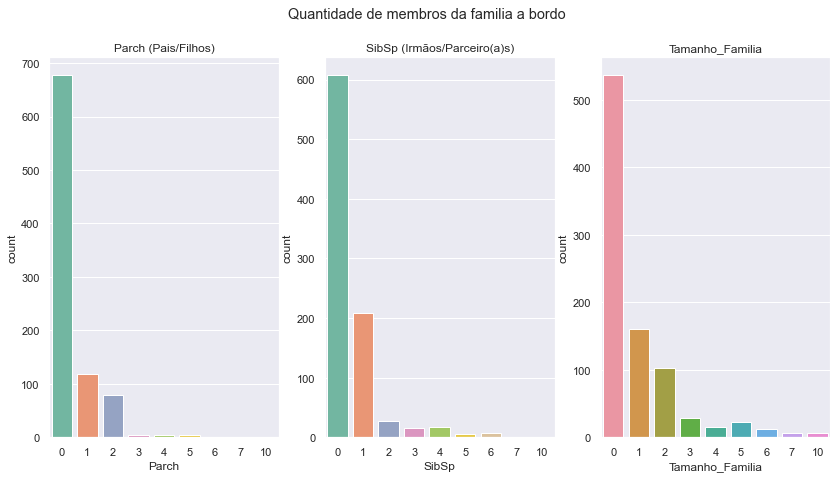

In [62]:
#Verificando visualmente a quantidade de pessoas com familiares ou acompanhantes no navio
figure, axes = plt.subplots(1,3, sharex=True, figsize=(14,7))
figure.suptitle('Quantidade de membros da familia a bordo')

#Parch
sns.countplot(ax=axes[0], x='Parch', data=df_train)
axes[0].set_title('Parch (Pais/Filhos)')

#Sibsp
sns.countplot(ax=axes[1], x='SibSp', data=df_train)
axes[1].set_title('SibSp (Irmãos/Parceiro(a)s)')

#Familia Total
sns.countplot(ax=axes[2], x='Tamanho_Familia', data=df_train)
axes[2].set_title('Tamanho_Familia')

<AxesSubplot:title={'center':'Sobreviventes do naufrágio'}, xlabel='Sex', ylabel='count'>

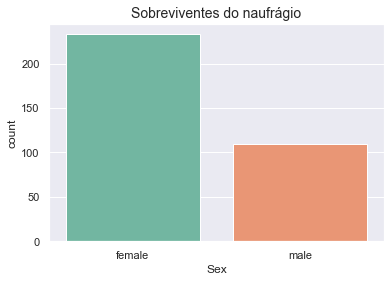

In [71]:
plt.title('Sobreviventes do naufrágio', fontsize=14)
sns.countplot(x='Sex', data=df_train[df_train['Survived'] == 1])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

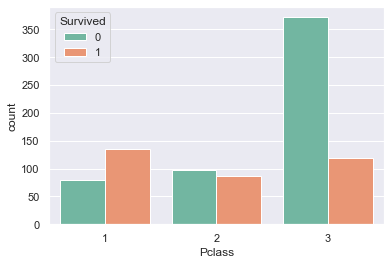

In [69]:
df_train.groupby('Pclass')['Age'].mean()
#sns.countplot(x='Pclass', data=df_train)
sns.countplot(x='Pclass', data=df_train, hue='Survived')

## Preparando os dados para a criação do modelo de Machine Learning

C:\Users\Pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


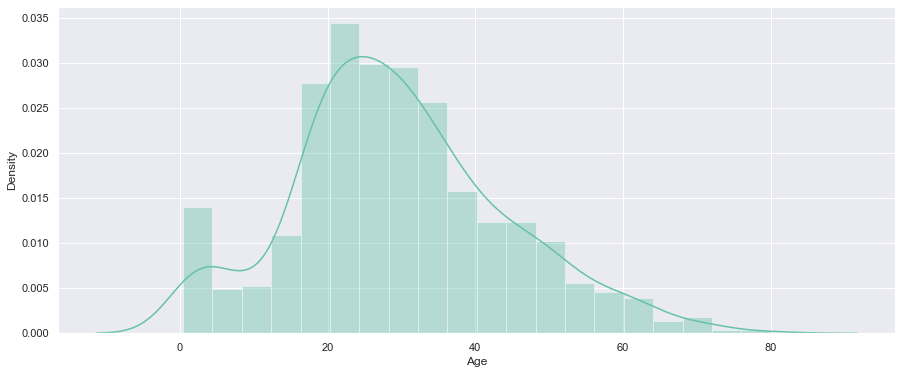

In [6]:
plt.figure(figsize=(15,6))
sns.distplot(df_train['Age'])
plt.show()

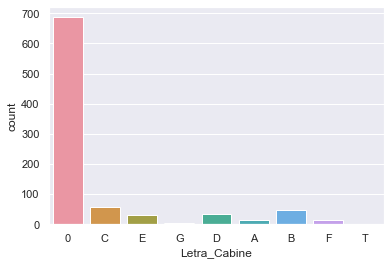

In [76]:
##Existem 148 cabines diferentes ocupadas no navio, sendo muitas variáveis para criar uma coluna numérica para cada uma, 
#então vou pegar apenas a primeira letra da cabine
#len(df_train.Cabin.unique())
df_train['Letra_Cabine'] = df_train['Cabin'].str[:1]
df_train['Letra_Cabine'] = df_train['Letra_Cabine'].fillna(0)
df_test['Letra_Cabine'] = df_test['Cabin'].str[:1]
df_test['Letra_Cabine'] = df_test['Letra_Cabine'].fillna(0)

sns.countplot(x='Letra_Cabine', data=df_train)

#Transformado as colunas categóricas em numéricas com o get_dummies
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Letra_Cabine'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Letra_Cabine'])

#Substituir os valores nulos das idades pela média das próprias colunas
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

df_train.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
df_test.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

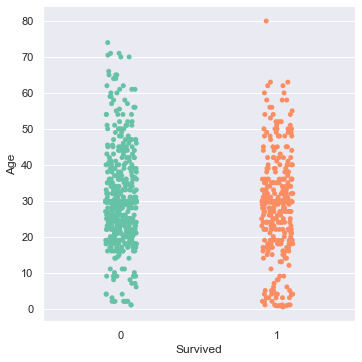

In [78]:
sns.catplot(data=df_train, x='Survived', y='Age')

In [7]:
#Cópia do dataframe para realizar o PCA 
df_auxiliar = df_train.copy()
df_auxiliar2 = df_train.copy()

df_auxiliar.drop(columns=['Letra_Cabine'], inplace=True)
df_auxiliar2.drop(columns=['Letra_Cabine'], inplace=True)

model = PCA(n_components=2)
X = model.fit_transform(df_auxiliar)
X_df = pd.DataFrame(X)
X_df.columns = ['X', 'Y']

sns.scatterplot(data=X_df, x='X', y='Y')

KeyError: "['Letra_Cabine'] not found in axis"

In [ ]:
#Método de clusterização KMeans utilizando o Elbow Method 
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_auxiliar)

alvo = df_auxiliar 

max = 10
km_scores = []
km_silhouette = []
vmeasure_score = []
db_score = []
gm_bic = []
gm_score = []

for i in range(2,max):
    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    
    km_scores.append(-km.score(alvo))

In [ ]:
plt.figure(figsize=(8,6))
plt,title('Elbow Method', fontsize=16)
plt.scatter(x=[i for i in range(2,max)], y=km_scores, edgecolor='k')
plt.grid(True)=
plt.xlabel('Número de clusteres', fontsize=14)
plt.ylabel('K-Means score', fontsize=14)
plt.xticks([i for i in range(2,max)], fontsize=14)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
#Teste de modelagem com o número de K = 5
clt_kmean = KMeans(n_clusters=5)
clt_kmean.fit(df_auxiliar)
labels = clt_kmean.predict(df_auxiliar)
df_auxiliar['Cluster'] = labels
display(df_auxiliar)

In [ ]:
#Plotagem do gráfico para ver a diferença visual entre o número de clusters 
plt.figure(figsize=(15,15))

#Aplicar o KMeans no dataframe 
for i in range(2,6):
    kmean = KMeans(n_clusters=i)
    kmean_list = kmean.fit_predict(df_auxiliar)
    X_df['KMean_' + str(i)] = kmean_list
    plt.subplot(3,3,i-1)
    sns.scatterplot(data=X_df, x='X', y='Y', hue='KMean_'+str(i))

In [ ]:
#Método de clusterização MeanShift
clt_ms = MeanShift()
cls_ms.fit(df_auxiliar2)
labels_ms = clt_ms.predict(df_auxiliar2)
df_auxiliar2['Cluster'] = labels_ms

In [ ]:
df_auxiliar2['Cluster'].value_counts()

In [ ]:
#Plotagem do gráfico do MeanShift com 5 clusters
analyzer = MeanShift(n_jobs=-1)
analyzer.fit(df_auxiliar2)
labels_ms = analyzer.labels_
print(np.unique(labels_ms))

X_df['MShift'] = labels_ms
display(X_df.head())

sns.scatterplot(data=X_df, x='X', y='Y', hue='MShift')

In [9]:
fig = plt.figure(figsize=(14,5))
sns.barplot(x=df_train['Sex'], hue=df_train['Survived'], y=df_train['Survived'].count())

AttributeError: 'bool' object has no attribute 'all'

<Figure size 1008x360 with 0 Axes>